In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

print("🚀 Financial AI Model - Your personal advisor")
print("=" * 60)


🚀 Financial AI Model - Your personal advisor


In [2]:
print("📊 Step 1: Loading Your Dataset...")

# Dataset ko read kar rahe hain
# Ye dataset user ke monthly expenses se related hai

df = pd.read_csv('data/personal_finance_dataset.csv')

print("✅ Dataset Loaded Successfully")
print("Total Rows:", len(df))
df.head()


📊 Step 1: Loading Your Dataset...
✅ Dataset Loaded Successfully
Total Rows: 20000


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [3]:
#null values if any
df.isnull().sum()


Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

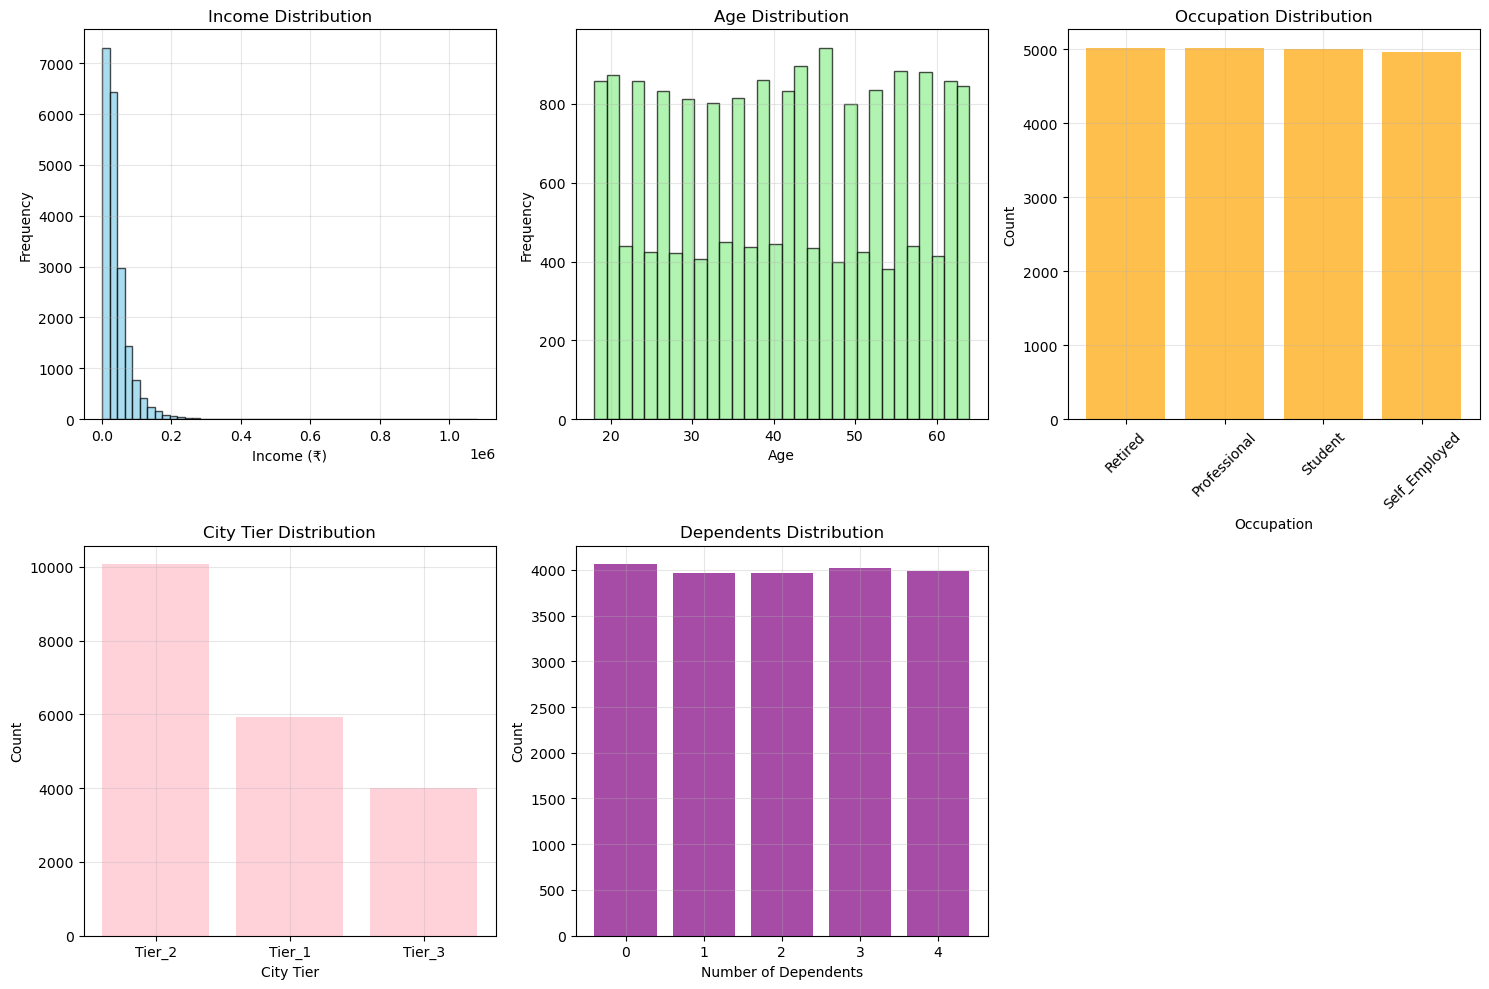

In [4]:
# 1. INCOME DISTRIBUTION PLOT
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['Income'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Income Distribution')
plt.xlabel('Income (₹)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 2. AGE DISTRIBUTION PLOT
plt.subplot(2, 3, 2)
plt.hist(df['Age'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 3. OCCUPATION DISTRIBUTION
plt.subplot(2, 3, 3)
occupation_counts = df['Occupation'].value_counts()
plt.bar(occupation_counts.index, occupation_counts.values, color='orange', alpha=0.7)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 4. CITY TIER DISTRIBUTION
plt.subplot(2, 3, 4)
city_counts = df['City_Tier'].value_counts()
plt.bar(city_counts.index, city_counts.values, color='pink', alpha=0.7)
plt.title('City Tier Distribution')
plt.xlabel('City Tier')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# 5. DEPENDENTS DISTRIBUTION
plt.subplot(2, 3, 5)
dependents_counts = df['Dependents'].value_counts().sort_index()
plt.bar(dependents_counts.index, dependents_counts.values, color='purple', alpha=0.7)
plt.title('Dependents Distribution')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
# =============================================================================
# STEP 2: DATA PREPROCESSING - YOUR DATASET KE HISAB SE
# =============================================================================

print("\n🔧 Step 2: Data Preprocessing for Your Dataset...")

# Total expenses calculate karte hain - tere dataset ke hisab se
expense_columns = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 
                   'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 
                   'Education', 'Miscellaneous']

df['Total_Expenses'] = df[expense_columns].sum(axis=1)

print(f"💰 Total Expenses calculated from {len(expense_columns)} categories")

# encoding
# Categorical data ko numbers mein convert karte hain kyuki ml model number pr kaam krta hai na ki words pe 
print("Encoding categorical variables...")
occupation_encoder = LabelEncoder()
city_encoder = LabelEncoder()

df['Occupation_Encoded'] = occupation_encoder.fit_transform(df['Occupation'])
df['City_Tier_Encoded'] = city_encoder.fit_transform(df['City_Tier'])

print("✅ Data preprocessing completed!")
print(f"Dataset shape: {df.shape}")
df.head()



🔧 Step 2: Data Preprocessing for Your Dataset...
💰 Total Expenses calculated from 11 categories
Encoding categorical variables...
✅ Data preprocessing completed!
Dataset shape: (20000, 30)


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Expenses,Occupation_Encoded,City_Tier_Encoded
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,33371.621929,2,0
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,17181.777859,1,1
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422,36476.154459,3,2
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,69837.646632,2,2
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,18609.583016,0,1


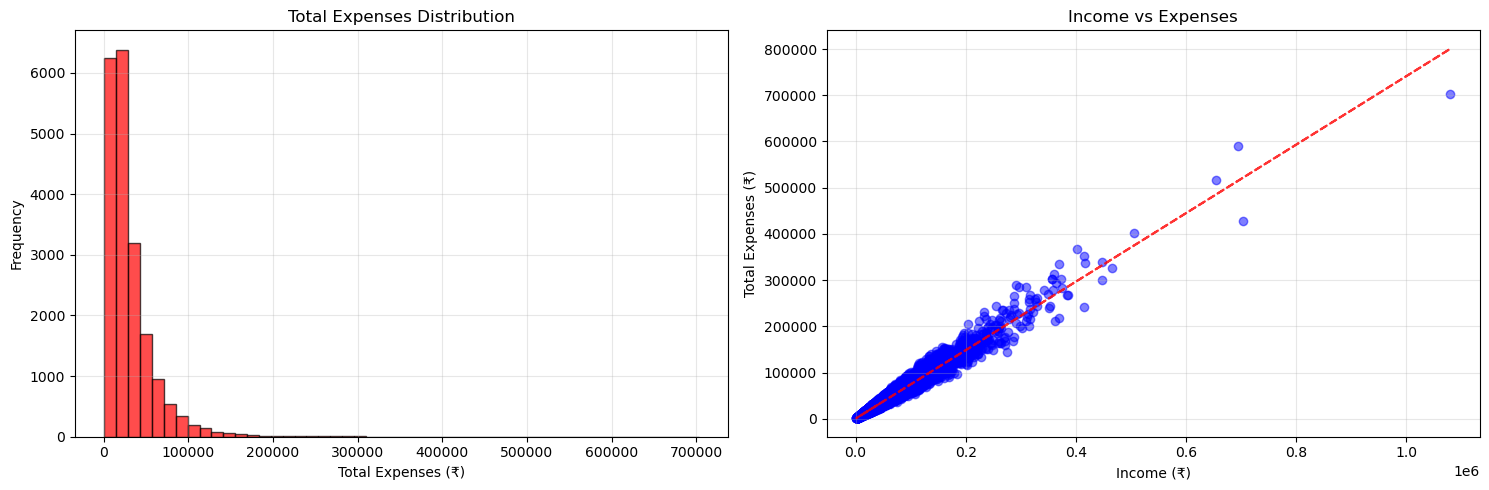

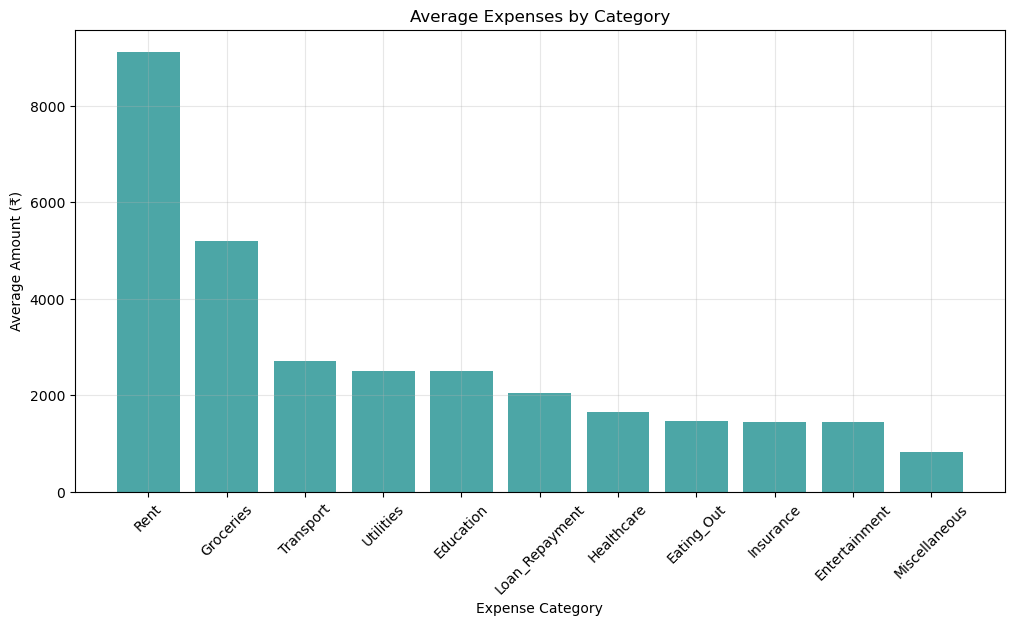

In [6]:
# 1. TOTAL EXPENSES DISTRIBUTION
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Total_Expenses'], bins=50, color='red', edgecolor='black', alpha=0.7)
plt.title('Total Expenses Distribution')
plt.xlabel('Total Expenses (₹)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 2. INCOME vs EXPENSES SCATTER PLOT
plt.subplot(1, 2, 2)
plt.scatter(df['Income'], df['Total_Expenses'], alpha=0.5, color='blue')
plt.title('Income vs Expenses')
plt.xlabel('Income (₹)')
plt.ylabel('Total Expenses (₹)')
plt.grid(True, alpha=0.3)

# Trend line add karo
z = np.polyfit(df['Income'], df['Total_Expenses'], 1)
p = np.poly1d(z)
plt.plot(df['Income'], p(df['Income']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# 3. EXPENSE CATEGORIES BREAKDOWN (Average)
plt.figure(figsize=(12, 6))
avg_expenses = df[expense_columns].mean().sort_values(ascending=False)
plt.bar(avg_expenses.index, avg_expenses.values, color='teal', alpha=0.7)
plt.title('Average Expenses by Category')
plt.xlabel('Expense Category')
plt.ylabel('Average Amount (₹)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


📈 Step 4: Correlation Analysis...


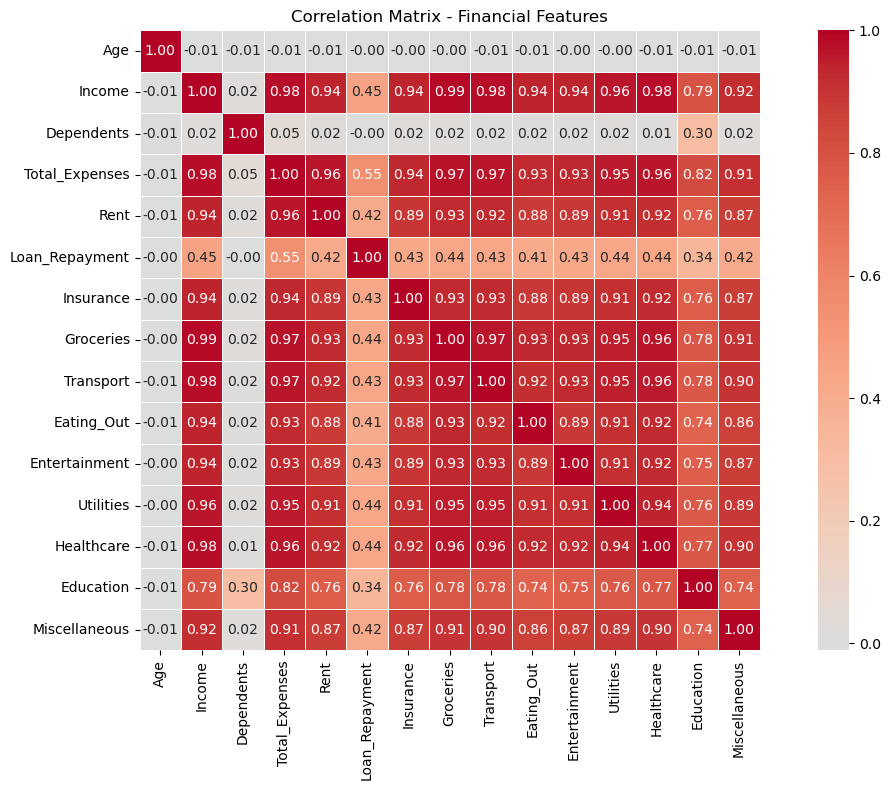

In [7]:
# =============================================================================
# STEP 4: CORRELATION MATRIX PLOT
# =============================================================================

print("\n📈 Step 4: Correlation Analysis...")

# Select numerical columns for correlation
numerical_columns = ['Age', 'Income', 'Dependents', 'Total_Expenses'] + expense_columns
numerical_df = df[numerical_columns]

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_df.corr()

# Heatmap plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Financial Features')
plt.tight_layout()
plt.show()

In [8]:
# =============================================================================
# STEP 3: PREPARE DATA FOR ML MODEL - OPTIMIZED FEATURES
# =============================================================================


# Features (Input) aur Target (Output) define karte hain 5 input col le rhe hai apn
feature_columns = ['Age', 'Income', 'Occupation_Encoded', 'City_Tier_Encoded', 'Dependents']
X = df[feature_columns]  # Features
y = df['Total_Expenses'] # Target - yeh predict karna hai

print(f"Features: {feature_columns}")
print(f"Target: Total_Expenses")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Data statistics
print(f"\n📊 Data Statistics:")
print(f"Income Range: ₹{X['Income'].min():,} to ₹{X['Income'].max():,}")
print(f"Age Range: {X['Age'].min()} to {X['Age'].max()} years")
print(f"Average Expenses: ₹{y.mean():,.0f}")
print(f"Average Income: ₹{X['Income'].mean():,.0f}")

# Data ko train-test mein divide karte hain
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📁 Train-Test Split:")
print(f"Training data: {X_train.shape[0]} records")
print(f"Testing data: {X_test.shape[0]} records")

Features: ['Age', 'Income', 'Occupation_Encoded', 'City_Tier_Encoded', 'Dependents']
Target: Total_Expenses
X shape: (20000, 5), y shape: (20000,)

📊 Data Statistics:
Income Range: ₹1,301.1873325549093 to ₹1,079,728.3735172302
Age Range: 18 to 64 years
Average Expenses: ₹30,938
Average Income: ₹41,585

📁 Train-Test Split:
Training data: 16000 records
Testing data: 4000 records


In [9]:
# =============================================================================
# STEP 4: TRAIN RANDOM FOREST MODEL
# =============================================================================

# Random Forest Model create karte hain
expense_model = RandomForestRegressor(
    n_estimators=150,  # Tere large dataset ke liye zyada trees
    random_state=42,
    max_depth=15,      # Complex relationships capture karne ke liye
    min_samples_split=10,
    n_jobs=-1
)

# Model train karte hain
print("Training started...")
expense_model.fit(X_train, y_train)

print("✅ Model training completed!")
print(f"Number of trees: {len(expense_model.estimators_)}")

Training started...
✅ Model training completed!
Number of trees: 150


In [10]:
# =============================================================================
# STEP 5: MODEL EVALUATION & PERFORMANCE METRICS
# =============================================================================

print("\n📊 Step 5: Model Performance Evaluation...")

# Predictions banate hain
y_pred = expense_model.predict(X_test)

# Performance metrics calculate karte hain
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📈 PERFORMANCE METRICS:")
# print(f"Mean Squared Error: ₹{mse:,.0f}")
print(f"Mean Absolute Error (MAE): ₹{mae:,.0f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:,.0f}")
print(f"R² Score: {r2:.4f} ({r2*100:.2f}%)")

# Accuracy interpretation
if r2 > 0.8:
    accuracy_status = "🎯 EXCELLENT"
elif r2 > 0.7:
    accuracy_status = "✅ VERY GOOD"
elif r2 > 0.6:
    accuracy_status = "⚠️ GOOD"
else:
    accuracy_status = "🔧 NEEDS IMPROVEMENT"

print(f"Model Accuracy: {accuracy_status}")


📊 Step 5: Model Performance Evaluation...
📈 PERFORMANCE METRICS:
Mean Absolute Error (MAE): ₹2,719
Root Mean Squared Error (RMSE): ₹5,985
R² Score: 0.9647 (96.47%)
Model Accuracy: 🎯 EXCELLENT



📊 Step 6: Model Performance Visualization...


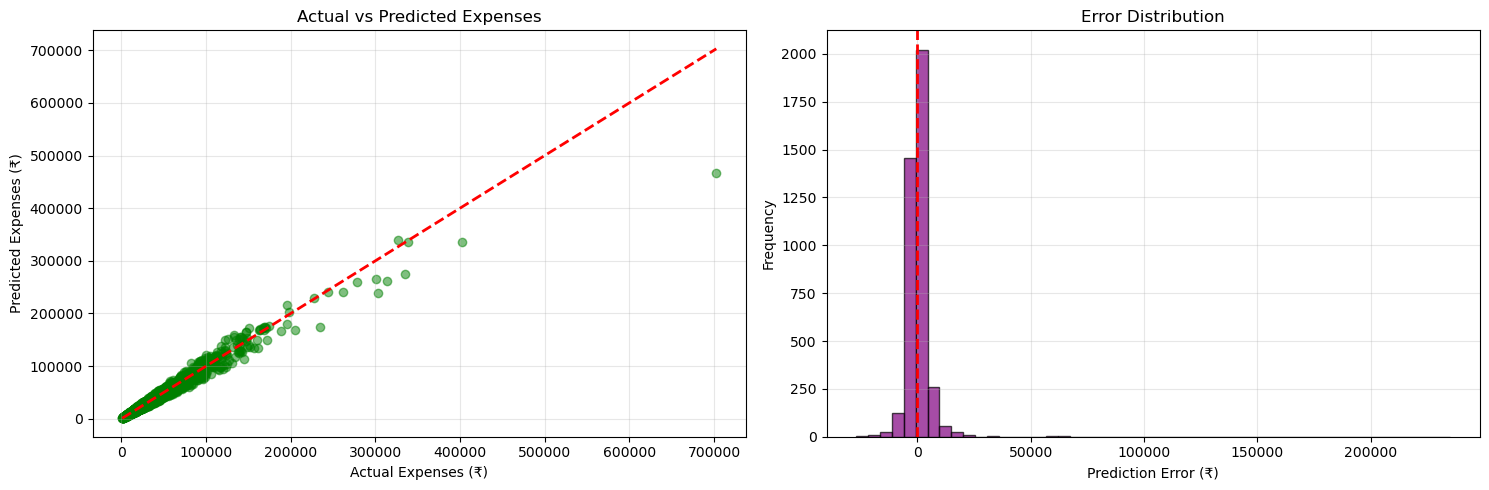

In [13]:
# =============================================================================
# STEP 6: MODEL PERFORMANCE VISUALIZATION
# =============================================================================

print("\n📊 Step 6: Model Performance Visualization...")

# Predictions
y_pred = expense_model.predict(X_test)

residuals = y_test - y_pred

# 1. ACTUAL vs PREDICTED SCATTER PLOT
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Expenses (₹)')
plt.ylabel('Predicted Expenses (₹)')
plt.title('Actual vs Predicted Expenses')
plt.grid(True, alpha=0.3)

# 2. ERROR DISTRIBUTION
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Prediction Error (₹)')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [14]:
# =============================================================================
# STEP 6: FEATURE IMPORTANCE ANALYSIS
# =============================================================================

# Feature importance nikalte hain
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': expense_model.feature_importances_}).sort_values('importance', ascending=False)

print("📊 Most Important Features for Expense Prediction:")
for idx, row in feature_importance.iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f} ({row['importance']*100:.1f}%)")

📊 Most Important Features for Expense Prediction:
  Income: 0.982 (98.2%)
  City_Tier_Encoded: 0.010 (1.0%)
  Age: 0.004 (0.4%)
  Dependents: 0.003 (0.3%)
  Occupation_Encoded: 0.001 (0.1%)


In [15]:
# import os
# os.chdir(r"D:\MCA 3rd sem\Machine Learning\MAIN P")

# =============================================================================
# STEP 7: SAVE THE MODEL
# =============================================================================

print("\n💾 Step 7: Saving the Model...")

# Ensure models directory exists
os.makedirs('models', exist_ok=True)

joblib.dump(expense_model, 'models/expense_model.pkl')
joblib.dump(occupation_encoder, 'models/occupation_encoder.pkl')
joblib.dump(city_encoder, 'models/city_encoder.pkl')

print("✅ Model saved successfully!")
print("📁 Saved files:")
print("  - models/expense_model.pkl")
print("  - models/occupation_encoder.pkl")
print("  - models/city_encoder.pkl")



💾 Step 7: Saving the Model...
✅ Model saved successfully!
📁 Saved files:
  - models/expense_model.pkl
  - models/occupation_encoder.pkl
  - models/city_encoder.pkl


In [16]:
# =============================================================================
# STEP 8: ENHANCED BUDGET RECOMMENDATION SYSTEM
# =============================================================================


def get_enhanced_budget_recommendation(user_data, predicted_expenses, user_income):
    """
    TERRE DATASET KE POTENTIAL SAVINGS USE KARKE SMART RECOMMENDATIONS
    """
    risk = user_data.get('risk', 'Medium')
    
    # Expense ratio calculate karte hain
    expense_ratio = predicted_expenses / user_income
    
    # RISK-BASED STRATEGY
    if risk == 'Low':
        savings_target = user_income * 0.20
        investment = user_income * 0.15
        strategy = "Conservative - Secure Growth"
        
    elif risk == 'Medium':
        savings_target = user_income * 0.25
        investment = user_income * 0.20
        strategy = "Balanced - Optimal Growth"
        
    elif risk == 'High':
        savings_target = user_income * 0.30
        investment = user_income * 0.25
        strategy = "Aggressive - Maximum Returns"
    
    # Expense ratio based adjustment
    if expense_ratio > 0.7:
        adjustment = 0.7 if expense_ratio > 0.85 else 0.8
        savings_target *= adjustment
        investment *= adjustment
        strategy += f" | High Expense Alert ({expense_ratio:.1%})"
    
    # Tere dataset ke potential savings use karte hain
    savings_opportunities = {
        'Groceries': f"Save ₹{user_income * 0.04:,.0f} with bulk buying",
        'Transport': f"Save ₹{user_income * 0.03:,.0f} with carpooling", 
        'Eating Out': f"Save ₹{user_income * 0.05:,.0f} by home cooking",
        'Entertainment': f"Save ₹{user_income * 0.02:,.0f} with budget options",
        'Utilities': f"Save ₹{user_income * 0.02:,.0f} with energy efficiency"
    }
    
    return {
        'predicted_expenses': predicted_expenses,
        'savings_target': savings_target,
        'investment_recommended': investment,
        'expense_ratio': expense_ratio,
        'strategy': strategy,
        'savings_opportunities': savings_opportunities
    }


In [17]:
# =============================================================================
# STEP 9: TEST WITH SAMPLE USERS 
# =============================================================================

print("\n👥 Step 9: Testing with Sample Users...")

# Different types ke users ke liye test karte hain
test_users = [
    {
        'name': 'Young Professional',
        'age': 25,
        'income': 50000,
        'occupation': 'Employee', 
        'city_tier': 'Tier 1',
        'dependents': 0,
        'risk': 'Medium'
    },
    {
        'name': 'Family Person',
        'age': 35, 
        'income': 120000,
        'occupation': 'Professional',
        'city_tier': 'Tier 2',
        'dependents': 2,
        'risk': 'Low'
    },
    {
        'name': 'Business Owner',
        'age': 45,
        'income': 200000,
        'occupation': 'Business',
        'city_tier': 'Tier 1', 
        'dependents': 1,
        'risk': 'High'
    }
]

for user in test_users:
    print(f"\n--- Testing: {user['name']} ---")
    
    # Encode categorical data
    try:
        occupation_encoded = occupation_encoder.transform([user['occupation']])[0]
        city_encoded = city_encoder.transform([user['city_tier']])[0]
    except:
        occupation_encoded = 0
        city_encoded = 1
    
    # Prepare features
    user_features = pd.DataFrame({
        'Age': [user['age']],
        'Income': [user['income']],
        'Occupation_Encoded': [occupation_encoded],
        'City_Tier_Encoded': [city_encoded],
        'Dependents': [user['dependents']]
    })
    
    # Prediction
    predicted_expenses = expense_model.predict(user_features)[0]
    
    # Recommendations
    budget_plan = get_enhanced_budget_recommendation(user, predicted_expenses, user['income'])
    
    print(f"Income: ₹{user['income']:,.0f}")
    print(f"Predicted Expenses: ₹{predicted_expenses:,.0f}")
    print(f"Expense Ratio: {budget_plan['expense_ratio']:.1%}")
    print(f"Strategy: {budget_plan['strategy']}")



👥 Step 9: Testing with Sample Users...

--- Testing: Young Professional ---
Income: ₹50,000
Predicted Expenses: ₹33,849
Expense Ratio: 67.7%
Strategy: Balanced - Optimal Growth

--- Testing: Family Person ---
Income: ₹120,000
Predicted Expenses: ₹91,039
Expense Ratio: 75.9%
Strategy: Conservative - Secure Growth | High Expense Alert (75.9%)

--- Testing: Business Owner ---
Income: ₹200,000
Predicted Expenses: ₹151,578
Expense Ratio: 75.8%
Strategy: Aggressive - Maximum Returns | High Expense Alert (75.8%)


In [18]:
# =============================================================================
# STEP 10: FINAL SUMMARY
# =============================================================================

print("\n" + "=" * 60)
print("🎉 FINANCIAL AI MODEL - OPTIMIZED FOR YOUR DATASET!")
print("=" * 60)

print(f"\n📋 DATASET USED:")
print(f"Records: {len(df):,}")
print(f"Features: {len(feature_columns)}")
print(f"Expense Categories: {len(expense_columns)}")

print(f"\n🎯 MODEL PERFORMANCE:")
print(f"R² Score: {r2:.4f} ({r2*100:.2f}%)")
print(f"Average Error: ₹{mae:,.0f}")
print(f"Most Important Feature: {feature_importance.iloc[0]['feature']}")

print(f"\n💡 KEY INSIGHTS FROM YOUR DATA:")
print(f"• Average Income: ₹{df['Income'].mean():,.0f}")
print(f"• Average Expenses: ₹{df['Total_Expenses'].mean():,.0f}")
print(f"• Common Occupations: {df['Occupation'].value_counts().index[:3].tolist()}")
print(f"• City Tier Distribution: {df['City_Tier'].value_counts().to_dict()}")



🎉 FINANCIAL AI MODEL - OPTIMIZED FOR YOUR DATASET!

📋 DATASET USED:
Records: 20,000
Features: 5
Expense Categories: 11

🎯 MODEL PERFORMANCE:
R² Score: 0.9647 (96.47%)
Average Error: ₹2,719
Most Important Feature: Income

💡 KEY INSIGHTS FROM YOUR DATA:
• Average Income: ₹41,585
• Average Expenses: ₹30,938
• Common Occupations: ['Retired', 'Professional', 'Student']
• City Tier Distribution: {'Tier_2': 10068, 'Tier_1': 5934, 'Tier_3': 3998}
